In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import numpy as np
import sklearn
import geopandas as gpd
from mpl_toolkits.basemap import Basemap

In [2]:
health = pd.read_csv('../../data/processed_data/health_nyc.csv')
merged = pd.read_csv('../../data/processed_data/data_nyc.csv')

In [3]:
col1 = 'water_gaussian'
col2 = 'green_gaussian'

In [4]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2168 entries, 0 to 2167
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   GEOID                                   2138 non-null   float64
 1   mean_percent_tree_cover                 2138 non-null   float64
 2   tree_gap                                2138 non-null   float64
 3   surface_temp                            2138 non-null   float64
 4   income_percent                          2138 non-null   float64
 5   income_group                            2138 non-null   float64
 6   pop_dens_group                          2138 non-null   float64
 7   GEOID10_x                               2168 non-null   int64  
 8   ALAND10                                 2168 non-null   int64  
 9   AWATER10                                2168 non-null   int64  
 10  geometry                                2168 non-null   obje

In [5]:
merged_ = pd.merge(merged, health, left_on='GEOID', right_on='LocationName', how='left')

In [6]:
vars = merged_.MeasureId.unique()
i = 22 # 22, 31
print(vars[i], merged_.Measure.unique()[i])
mask = merged_.MeasureId == vars[i]
df = merged_[mask]
# df = merged_[mask][((df[col1] > 0) & (df[col2] > 0))]

DEPRESSION Depression among adults aged >=18 years


In [7]:
# print(merged_.Measure.unique(), vars, len(vars))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 22 to 63544
Data columns (total 38 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   GEOID                                   2117 non-null   float64
 1   mean_percent_tree_cover                 2117 non-null   float64
 2   tree_gap                                2117 non-null   float64
 3   surface_temp                            2117 non-null   float64
 4   income_percent                          2117 non-null   float64
 5   income_group                            2117 non-null   float64
 6   pop_dens_group                          2117 non-null   float64
 7   GEOID10_x                               2117 non-null   int64  
 8   ALAND10                                 2117 non-null   int64  
 9   AWATER10                                2117 non-null   int64  
 10  geometry                                2117 non-null   ob

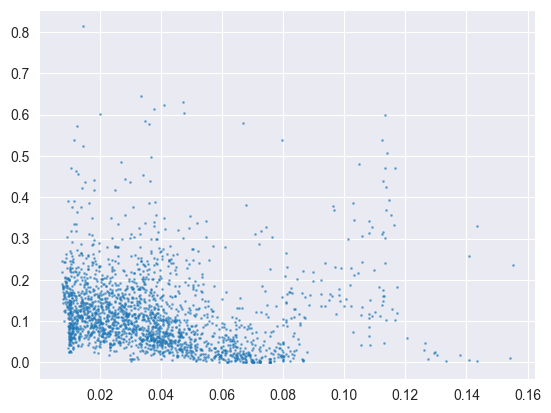

In [9]:
#plot scatter plot
plt.scatter(df[col1], df[col2], alpha=0.5, s=1)

In [ ]:
from sklearn.cluster import KMeans

# no warnings
pd.options.mode.chained_assignment = None


fips = df.GEOID10_x.astype(str).str[:5].unique()
df['cls'] = 0
for fip in fips:
    mask = df.GEOID10_x.astype(str).str[:5] == fip
    df2 = df[mask]
    # normalize
    df2[col1] = (df2[col1] - df2[col1].min()) / (df2[col1].max() - df2[col1].min())
    df2[col2] = (df2[col2] - df2[col2].min()) / (df2[col2].max() - df2[col2].min())
    
    km = KMeans(n_clusters=4)
    km.fit(df2[[col1, col2]])
    # plt.figure()
    # plt.scatter(df2[col1], df2[col2], c=km.labels_, cmap='rainbow', s=2)
    # plt.xlabel(col1)
    # plt.ylabel(col2)
    
    # assign class
    x = km.cluster_centers_.argsort(axis=0)[:, 0]
    dct = {x[i]: i for i in range(len(x))}
    # print(dct)
    # print(km.cluster_centers_, x, pd.Series(km.labels_).map(dct))
    y = pd.Series(km.labels_).map(dct).values
    df['cls'][mask] = y
    # print(len(df), len(df2), len(df[mask]), len(y), list(y))
    # print(df['cls'].value_counts())
df['cls'].value_counts()

In [11]:
# normalize data
df[col1] = (df[col1] - df[col1].mean()) / df[col1].std()
df[col2] = (df[col2] - df[col2].mean()) / df[col2].std()

In [12]:
# df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 22 to 63544
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   GEOID                                   2117 non-null   float64
 1   mean_percent_tree_cover                 2117 non-null   float64
 2   tree_gap                                2117 non-null   float64
 3   surface_temp                            2117 non-null   float64
 4   income_percent                          2117 non-null   float64
 5   income_group                            2117 non-null   float64
 6   pop_dens_group                          2117 non-null   float64
 7   GEOID10_x                               2117 non-null   int64  
 8   ALAND10                                 2117 non-null   int64  
 9   AWATER10                                2117 non-null   int64  
 10  geometry                                2117 non-null   ob

In [73]:
# df

In [ ]:
# make categorical
df['class'] = df['cls'].astype(int).astype('category')
# plot df with different color for each class
plt.figure()
for i in range(4):
    mask = df['cls'] == i
    print(mask.sum())
    plt.scatter(df[mask][col1], df[mask][col2], s=2, label=i)
plt.legend()

In [ ]:
# make categorical
mask = df.GEOID10_x.astype(str).str[:5] == fips[3]
df_temp = df.copy()[mask]
df_temp['class'] = df_temp['cls'].astype(int).astype('category')
# plot df with different color for each class
plt.figure()
for i in range(4):
    mask = df_temp['cls'] == i
    print(mask.sum())
    plt.scatter(df_temp[mask][col1], df_temp[mask][col2], s=2, label=i)
plt.legend()

Text(37.28125, 0.5, 'green_gaussian')

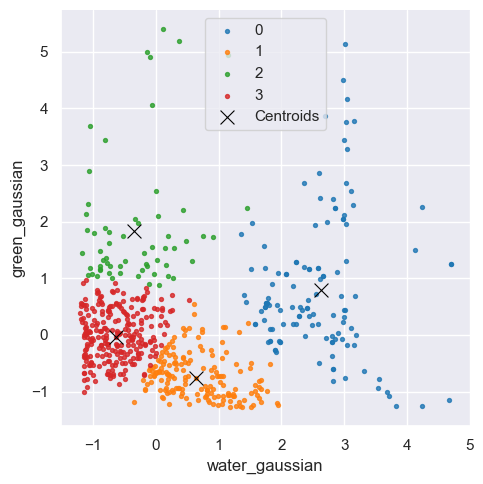

In [41]:

# do k means clustering
from sklearn.cluster import KMeans
KMeans = KMeans(n_clusters=4, random_state=42)
KMeans.fit(df[[col1, col2]])

sns.set(rc={'figure.figsize':(15, 5)})
df['class'] = 3 - KMeans.labels_.astype(int)
# make plot with clusters and labels using sns
# dont use all points on plot, use only 1000
data = df
sns.lmplot(x=col1, y=col2, data=data, fit_reg=False, hue='class', legend=False, scatter_kws={"s": 8}, palette='tab10')

# plot centroids
sns.scatterplot(x=KMeans.cluster_centers_[:,0], y=KMeans.cluster_centers_[:,1], s=100, color='black', marker='x', label='Centroids')

plt.grid(True)
plt.xlabel(col1)
plt.ylabel('green_gaussian')

In [21]:
KMeans.cluster_centers_

array([[-0.63816669, -0.02981268],
       [-0.35530874,  1.83595941],
       [ 0.64684609, -0.75246104],
       [ 2.6291452 ,  0.79471954]])

In [ ]:
# divide into 4 quadrants with equal number of points
# med_1 = df[col1].median() # median of water
# med_2 = df[col2].median() # median of tree cover
# med_1a = df[df[col2] < med_2][col1].median() # median of water in low tree cover
# med_1b = df[df[col2] > med_2][col1].median() # median of water in high tree cover
# med_2a = df[df[col1] < med_1][col2].median() # median of tree cover in low water
# med_2b = df[df[col1] > med_1][col2].median() # median of tree cover in high water

# mask1 = (df[col1] > med_1) & (df[col2] > med_2b) # high tree cover, high water
# mask2 = (df[col1] < med_1) & (df[col2] > med_2a) # high tree cover, low water 
# mask3 = (df[col1] > med_1) & (df[col2] < med_2b) # low tree cover, high water
# mask4 = (df[col1] < med_1) & (df[col2] < med_2a) # low tree cover, low water

# mask1 = (df[col1] >= med_1a) & (df[col2] >= med_2b) # high tree cover, high water
# mask2 = (df[col1] <= med_1a) & (df[col2] >= med_2a) # high tree cover, low water
# mask3 = (df[col1] >= med_1b) & (df[col2] <= med_2b) # low tree cover, high water
# mask4 = (df[col1] <= med_1b) & (df[col2] <= med_2a) # low tree cover, low water

# mask1 = KMeans.labels_ == 3 #2
# mask2 = KMeans.labels_ == 1 #3
# mask3 = KMeans.labels_ == 2 #0
# mask4 = KMeans.labels_ == 0 #1

mask1 = df['cls'] == 3
mask2 = df['cls'] == 1
mask3 = df['cls'] == 2
mask4 = df['cls'] == 0
mask1.sum(), mask2.sum(), mask3.sum(), mask4.sum()

In [ ]:
print(df[mask1].mean_percent_tree_cover.median(), df[mask1].water_gaussian.median())
print(df[mask2].mean_percent_tree_cover.median(), df[mask2].water_gaussian.median())
print(df[mask3].mean_percent_tree_cover.median(), df[mask3].water_gaussian.median())
print(df[mask4].mean_percent_tree_cover.median(), df[mask4].water_gaussian.median())

In [241]:
# save the geoids of the 4 quadrants
df[mask1].GEOID10_x.unique().tofile('../../data/processed_data/high_tree_high_water_2.csv', sep=',')
df[mask2].GEOID10_x.unique().tofile('../../data/processed_data/high_tree_low_water_2.csv', sep=',')
df[mask3].GEOID10_x.unique().tofile('../../data/processed_data/low_tree_high_water_2.csv', sep=',')
df[mask4].GEOID10_x.unique().tofile('../../data/processed_data/low_tree_low_water_2.csv', sep=',')

In [31]:
df['class'] = df['class'].map({0: 'low_tree_low_water', 1: 'low_tree_high_water', 2: 'high_tree_low_water', 3: 'high_tree_high_water'})

/var/folders/5t/fxl9hmt15b9gy4kpwg48tz2w0000gn/T/ipykernel_20271/1196921765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = df['class'].map({0: 'low_tree_low_water', 1: 'low_tree_high_water', 2: 'high_tree_low_water', 3: 'high_tree_high_water'})


<AxesSubplot: xlabel='class', ylabel='surface_temp'>

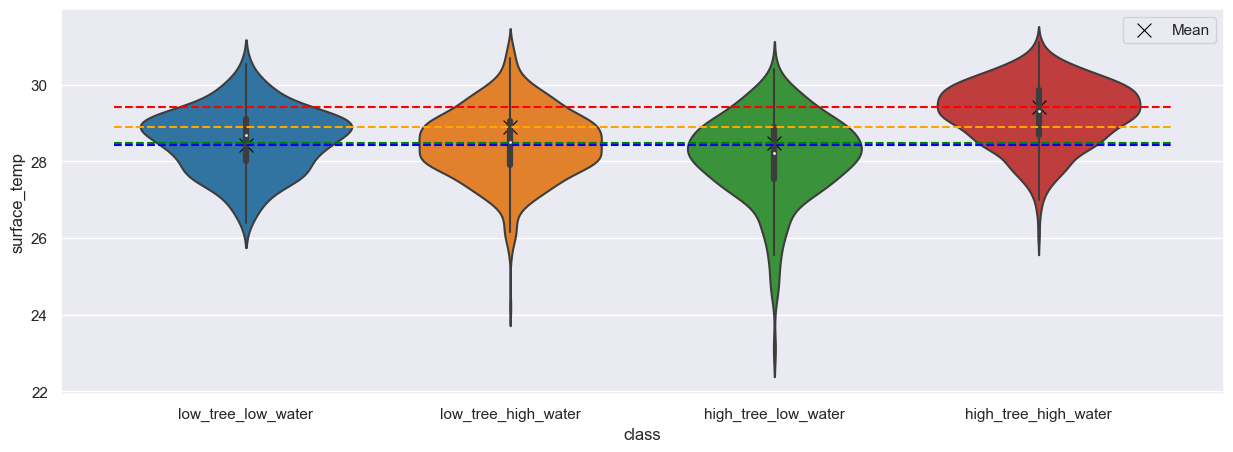

In [35]:
col3 = 'surface_temp'
# df[mask1][col3].mean(), df[mask2][col3].mean(), df[mask3][col3].mean(), df[mask4][col3].mean()

# make violin plot for surface temp and mark mean values
sns.violinplot(x='class', y=col3, data=df, palette='tab10')
sns.scatterplot(x=[0, 1, 2, 3], y=[df[mask1][col3].mean(), df[mask2][col3].mean(), df[mask3][col3].mean(), df[mask4][col3].mean()], s=100, color='black', marker='x', label='Mean')

# make horizontal lines for mean values
sns.lineplot(x=[-0.5, 3.5], y=[df[mask1][col3].mean(), df[mask1][col3].mean()], color='blue', linestyle='--')
sns.lineplot(x=[-0.5, 3.5], y=[df[mask2][col3].mean(), df[mask2][col3].mean()], color='orange', linestyle='--')
sns.lineplot(x=[-0.5, 3.5], y=[df[mask3][col3].mean(), df[mask3][col3].mean()], color='green', linestyle='--')
sns.lineplot(x=[-0.5, 3.5], y=[df[mask4][col3].mean(), df[mask4][col3].mean()], color='Red', linestyle='--')

In [ ]:
# plot surface temp for each quadrant with error bars for standard deviation
plt.plot([1, 2, 3, 4], [df[mask1][col3].mean(), df[mask2][col3].mean(), df[mask3][col3].mean(), df[mask4][col3].mean()], 'o')
plt.errorbar([1, 2, 3, 4], [df[mask1][col3].mean(), df[mask2][col3].mean(), df[mask3][col3].mean(), df[mask4][col3].mean()], yerr=[df[mask1][col3].std(), df[mask2][col3].std(), df[mask3][col3].std(), df[mask4][col3].std()], fmt='o')